# Working First time on time series data 

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime #to work on time data
from pandas import Series
%matplotlib inline
import warnings
from sklearn.metrics import mean_squared_error
from math import sqrt
from statsmodels.tsa.api import ExponentialSmoothing,SimpleExpSmoothing, Holt

In [2]:
data_raw=pd.read_csv("Train_SU63ISt.csv")
data_test=pd.read_csv("Test_0qrQsBZ.csv")

In [3]:
data_raw.describe()
data_raw.head()
 

,ID,Datetime,Count
0,0,25-08-2012 00:00,8
1,1,25-08-2012 01:00,2
2,2,25-08-2012 02:00,6
3,3,25-08-2012 03:00,2
4,4,25-08-2012 04:00,2


In [4]:
data_test.head()
data_test.describe()

,ID
count,5112.000000
mean,20843.500000
std,1475.851619
min,18288.000000
25%,19565.750000
50%,20843.500000
75%,22121.250000
max,23399.000000


# Hypothesis_generation

Hypothesis generation helps us to point out the factors which might affect our dependent variable. Below are some of the hypotheses which I think can affect the passenger count(dependent variable for this time series problem) on the JetRail:

There will be an increase in the traffic as the years pass by.
Explanation - Population has a general upward trend with time, so I can expect more people to travel by JetRail. Also, generally companies expand their businesses over time leading to more customers travelling through JetRail.
The traffic will be high from May to October.
Explanation - Tourist visits generally increases during this time period.
Traffic on weekdays will be more as compared to weekends/holidays.
Explanation - People will go to office on weekdays and hence the traffic will be more
Traffic during the peak hours will be high.
Explanation - People will travel to work, college.
We will try to validate each of these hypothesis based on the dataset. Now let’s have a look at the dataset.

In [5]:
train_original=data_raw.copy()
test_original=data_test.copy()

In [6]:
data_raw.columns,data_test.columns

(Index([u'ID', u'Datetime', u'Count'], dtype='object'),
 Index([u'ID', u'Datetime'], dtype='object'))

In [7]:
data_raw.shape,data_test.shape

((18288, 3), (5112, 2))

In [8]:
data_raw.dtypes,data_test.dtypes

(ID           int64
 Datetime    object
 Count        int64
 dtype: object, ID           int64
 Datetime    object
 dtype: object)

 Feature Extraction
We will extract the time and date from the Datetime. We have seen earlier that the data type of Datetime is object. So first of all we have to change the data type to datetime format otherwise we can not extract features from it.

In [9]:
data_raw['Datetime']=pd.to_datetime(data_raw['Datetime'],format='%d-%m-%Y %H:%M')
data_test['Datetime']=pd.to_datetime(data_test['Datetime'],format='%d-%m-%Y %H:%M')

test_original['Datetime']=pd.to_datetime(test_original['Datetime'],format='%d-%m-%Y %H:%M')
train_original['Datetime']=pd.to_datetime(train_original['Datetime'],format='%d-%m-%Y %H:%M')

We made some hypothesis for the effect of hour, day, month and year on the passenger count. So, let’s extract the year, month, day and hour from the Datetime to validate our hypothesis.

In [10]:
for i in data_raw, data_test, test_original, train_original:
    i['day']=i.Datetime.dt.day
    i['year']=i.Datetime.dt.year
    i['month']=i.Datetime.dt.month
    i['hour']=i.Datetime.dt.hour

We made a hypothesis for the traffic pattern on weekday and weekend as well. So, let’s make a weekend variable to visualize the impact of weekend on traffic.

We will first extract the day of week from Datetime and then based on the values we will assign whether the day is a weekend or not.

Values of 5 and 6 represents that the days are weekend.



In [11]:
data_raw['day_of_week']=data_raw.Datetime.dt.dayofweek
temp=data_raw['Datetime']

In [12]:
def applyer(row):
    if row.dayofweek==5 or row.dayofweek==6:
        return 1
    else:
        return 0
    


In [13]:
temp2=data_raw['Datetime'].apply(applyer)
data_raw['weekends']=temp2

Let’s look at the time series.

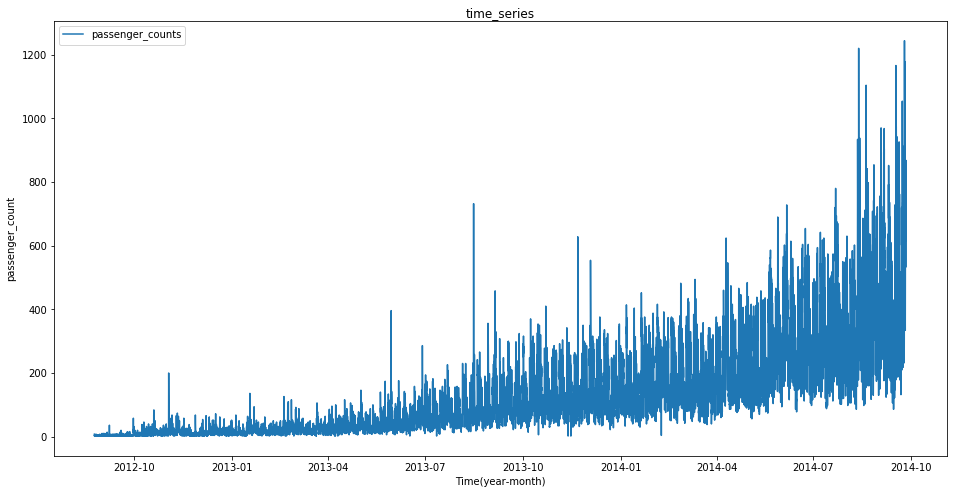

In [14]:
data_raw.index=data_raw['Datetime'] #indexing the datetime to get the datetime on the x-axis
df=data_raw.drop('ID',1)
ts=df['Count']
plt.figure(figsize=(16,8))
plt.plot(ts,label='passenger_counts')
plt.title('time_series')
plt.xlabel("Time(year-month)")
plt.ylabel("passenger_count")
plt.legend(loc='best')

Lets recall the hypothesis that we made earlier:

Traffic will increase as the years pass by
Traffic will be high from May to October
Traffic on weekdays will be more
Traffic during the peak hours will be high
After having a look at the dataset, we will now try to validate our hypothesis and make other inferences from the dataset.

5) Exploratory Analysis
Let us try to verify our hypothesis using the actual data.

Our first hypothesis was traffic will increase as the years pass by. So let’s look at yearly passenger count.

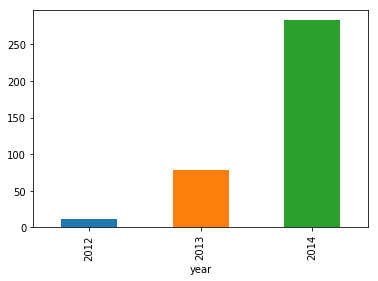

In [15]:
data_raw.groupby('year')['Count'].mean().plot.bar()

We see an exponential growth in the traffic with respect to year which validates our hypothesis.

Our second hypothesis was about increase in traffic from May to October. So, let’s see the relation between count and month.

 

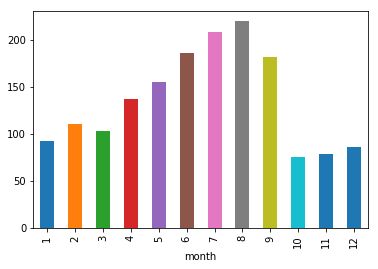

In [16]:
data_raw.groupby('month')['Count'].mean().plot.bar()

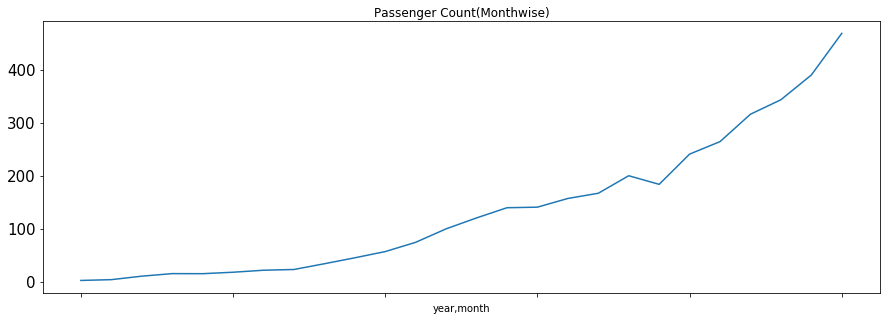

In [17]:
temp=data_raw.groupby(['year', 'month'])['Count'].mean() 
temp.plot(figsize=(15,5), title= 'Passenger Count(Monthwise)', fontsize=15)

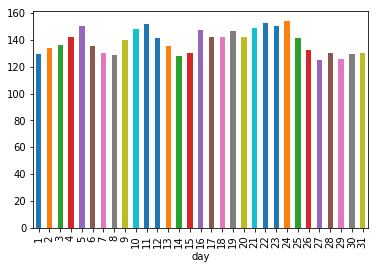

In [18]:
data_raw.groupby('day')['Count'].mean().plot.bar()

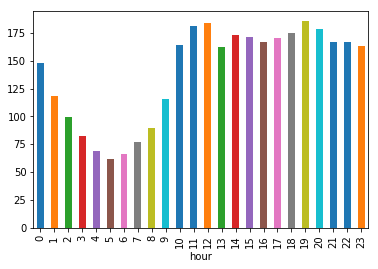

In [19]:
data_raw.groupby('hour')['Count'].mean().plot.bar()

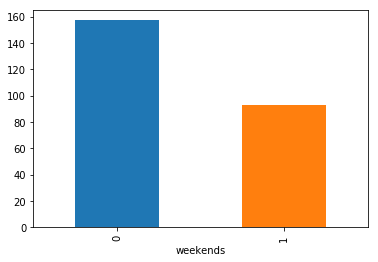

In [20]:
data_raw.groupby('weekends')['Count'].mean().plot.bar()

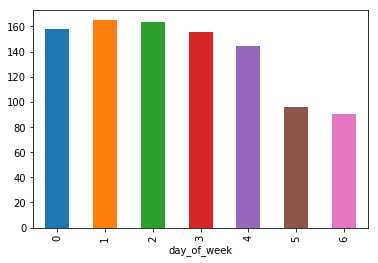

In [21]:
data_raw.groupby('day_of_week')['Count'].mean().plot.bar()

In [22]:
data_raw=data_raw.drop('ID',1)

In [23]:
daily=data_raw.resample('D').mean()
monthly=data_raw.resample('M').mean()
hourly=data_raw.resample('H').mean()
weekly=data_raw.resample('W').mean()
yearly=data_raw.resample('Y').mean()


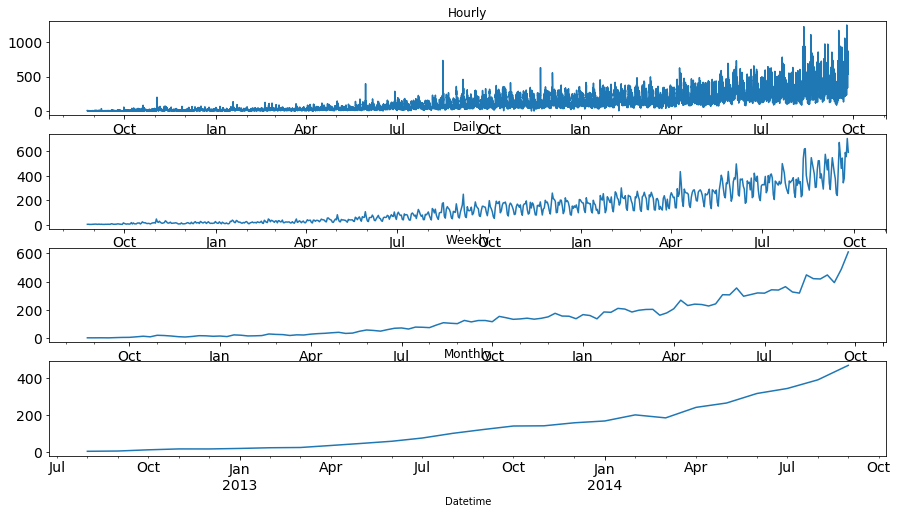

In [24]:
fig,axs=plt.subplots(4,1)
hourly.Count.plot(figsize=(15,8), title= 'Hourly', fontsize=14, ax=axs[0]) 
daily.Count.plot(figsize=(15,8), title= 'Daily', fontsize=14, ax=axs[1]) 
weekly.Count.plot(figsize=(15,8), title= 'Weekly', fontsize=14, ax=axs[2]) 
monthly.Count.plot(figsize=(15,8), title= 'Monthly', fontsize=14, ax=axs[3]) 
plt.show()

We can see that the time series is becoming more and more stable when we are aggregating it on daily, weekly and monthly basis.

But it would be difficult to convert the monthly and weekly predictions to hourly predictions, as first we have to convert the monthly predictions to weekly, weekly to daily and daily to hourly predictions, which will become very expanded process. So, we will work on the daily time series.

In [25]:
data_test.index=data_test.Datetime
data_test=data_test.resample('D').mean()

In [26]:
data_raw=data_raw.resample('D').mean()

1) Splitting the data into training and validation part

In [29]:
Train=data_raw.loc['2012-08-25':'2014-06-24']
valid=data_raw.loc['2014-06-25':'2014-09-25']

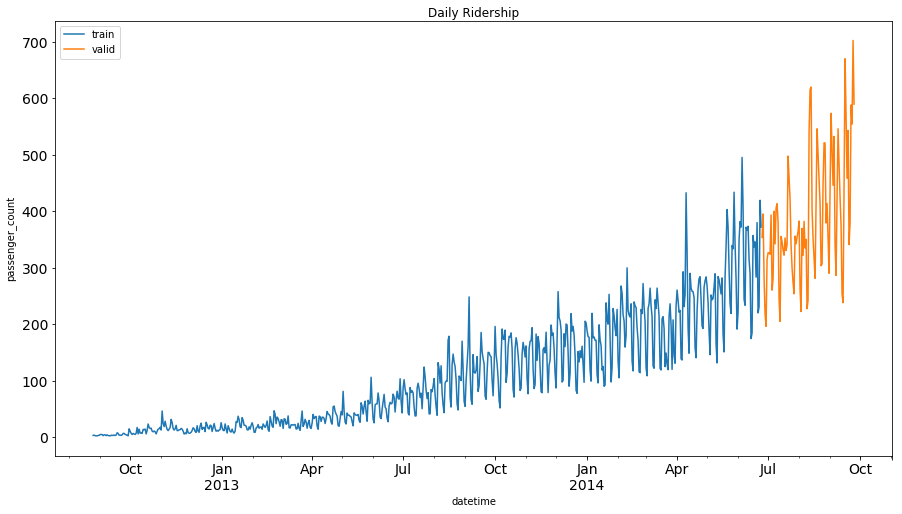

In [30]:
Train.Count.plot(figsize=(15,8),title='Daily Ridership',fontsize=14,label='train')
valid.Count.plot(figsize=(15,8),title='Daily Ridership',fontsize=14,label='valid')
plt.xlabel('datetime')
plt.ylabel('passenger_count')
plt.legend(loc='best')
plt.show()

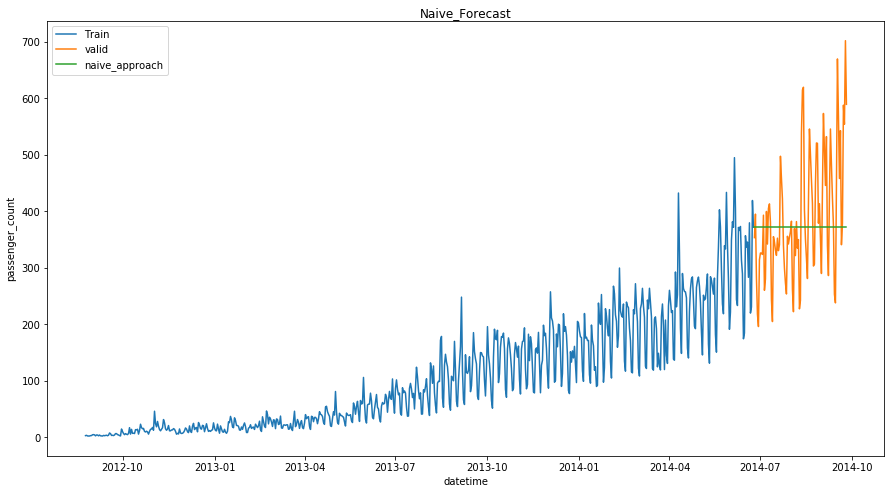

In [33]:
dd=np.asarray(Train.Count)
y_hat=valid.copy()
y_hat['naive_approach']=dd[len(dd)-1]

plt.figure(figsize=(15,8))
plt.plot(Train.index,Train['Count'],label='Train')
plt.plot(valid.index,valid['Count'],label='valid')
plt.plot(y_hat.index,y_hat['naive_approach'])
plt.xlabel('datetime')
plt.ylabel('passenger_count')
plt.legend(loc='best')
plt.title('Naive_Forecast')
plt.show()

Checking accuracy of Naive forecasting

In [39]:
rms=sqrt(mean_squared_error(valid['Count'],y_hat['naive_approach']))
print(rms)

111.790504675


ii) Moving Average
In this technique we will take the average of the passenger counts for last few time periods only.

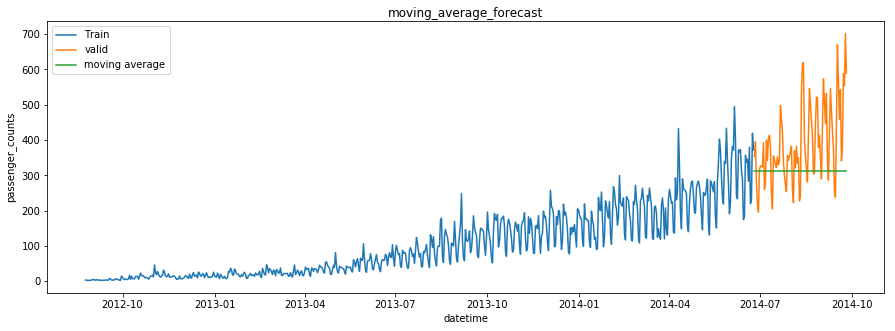

In [47]:
y_hat_avg=valid.copy()
y_hat_avg['moving_average']=Train['Count'].rolling(10).mean().iloc[-1]
plt.figure(figsize=(15,5))
plt.plot(Train['Count'],label='Train')
plt.plot(valid['Count'],label='valid')
plt.plot(y_hat_avg['moving_average'],label='moving average')
plt.xlabel('datetime')
plt.ylabel('passenger_counts')
plt.title('moving_average_forecast')
plt.legend(loc='best')
plt.show()

In [48]:
rms=sqrt(mean_squared_error(valid['Count'],y_hat_avg['moving_average']))
print(rms)

134.23733309


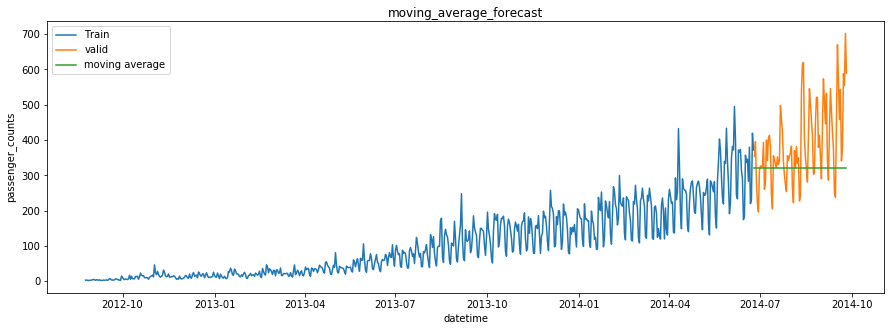

In [49]:
y_hat_avg=valid.copy()
y_hat_avg['moving_average']=Train['Count'].rolling(20).mean().iloc[-1]
plt.figure(figsize=(15,5))
plt.plot(Train['Count'],label='Train')
plt.plot(valid['Count'],label='valid')
plt.plot(y_hat_avg['moving_average'],label='moving average')
plt.xlabel('datetime')
plt.ylabel('passenger_counts')
plt.title('moving_average_forecast')
plt.legend(loc='best')
plt.show()

In [50]:
rms=sqrt(mean_squared_error(valid['Count'],y_hat_avg['moving_average']))
print(rms)

130.449849776


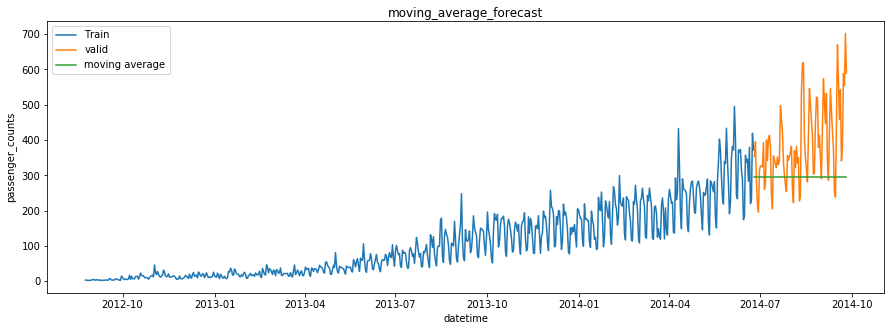

In [51]:
y_hat_avg=valid.copy()
y_hat_avg['moving_average']=Train['Count'].rolling(50).mean().iloc[-1]
plt.figure(figsize=(15,5))
plt.plot(Train['Count'],label='Train')
plt.plot(valid['Count'],label='valid')
plt.plot(y_hat_avg['moving_average'],label='moving average')
plt.xlabel('datetime')
plt.ylabel('passenger_counts')
plt.title('moving_average_forecast')
plt.legend(loc='best')
plt.show()

In [52]:
rms=sqrt(mean_squared_error(valid['Count'],y_hat_avg['moving_average']))
print(rms)

144.1917568


iii) Simple Exponential Smoothing
In this technique, we assign larger weights to more recent observations than to observations from the distant past.
The weights decrease exponentially as observations come from further in the past, the smallest weights are associated with the oldest observations.
NOTE - If we give the entire weight to the last observed value only, this method will be similar to the naive approach. So, we can say that naive approach is also a simple exponential smoothing technique where the entire weight is given to the last observed value

In [57]:
y_hat_aveg=valid.copy()
fit2=SimpleExpSmoothing(np.asarray(Train['Count'])).fit(smoothing_level=0.6,optimized=False)

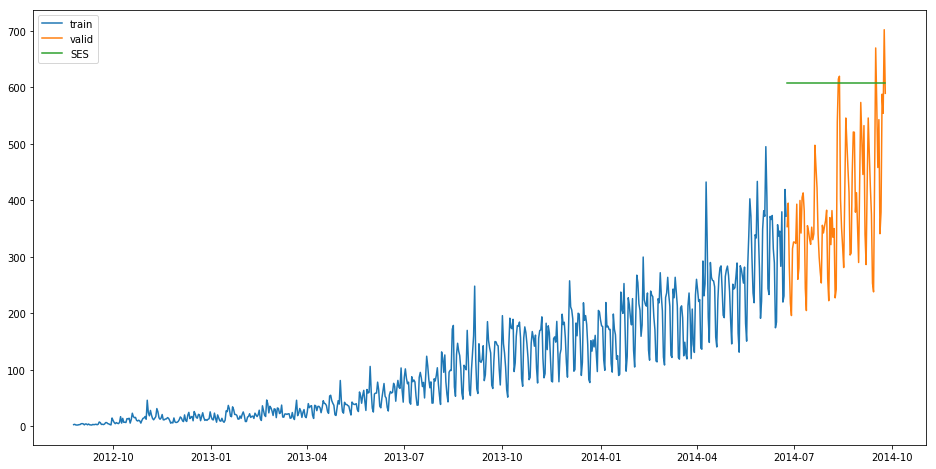

In [59]:
y_hat_aveg['SES']=fit2.forecast(len(valid))
plt.figure(figsize=(16,8))
plt.plot(Train['Count'],label='train')
plt.plot(valid['Count'],label='valid')
plt.plot(y_hat_aveg['SES'],label='SES')
plt.legend(loc='best')
plt.show()

In [60]:
rms=sqrt(mean_squared_error(valid['Count'],y_hat_aveg['SES']))
print(rms)

245.232076001


Holt's Linear trend model

In [61]:
import statsmodels.api as sm

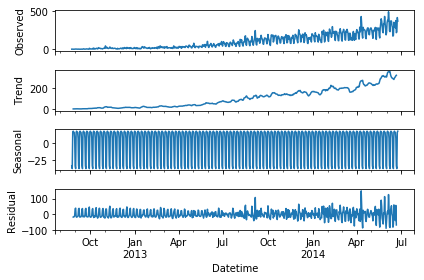

In [63]:
sm.tsa.seasonal_decompose(Train['Count']).plot()
result=sm.tsa.stattools.adfuller(data_raw.Count)
plt.show()

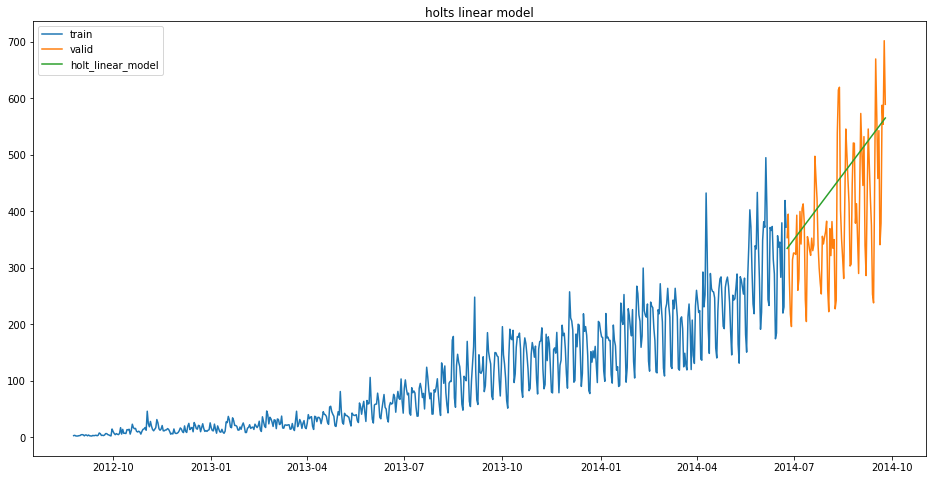

In [67]:
y_hat_avg=valid.copy()
fit1=Holt(np.asarray(Train['Count'])).fit(smoothing_level=0.3,smoothing_slope=0.1)
y_hat_avg['holt']=fit1.forecast(len(valid))
plt.figure(figsize=(16,8))
plt.plot(Train['Count'],label='train')
plt.plot(valid['Count'],label='valid')
plt.plot(y_hat_avg['holt'],label='holt_linear_model')
plt.legend(loc='best')
plt.title('holts linear model')
plt.show()

In [68]:
rms=sqrt(mean_squared_error(valid['Count'],y_hat_avg['holt']))
print(rms)

112.942783453


In [125]:
submission=pd.read_csv("Sample_Submission_QChS6c3.csv")
 

In [126]:
predict=fit1.forecast(len(data_test))
data_test['prediction']=predict


In [129]:
# Calculating the hourly ratio of count 
train_original['ratio']=train_original['Count']/train_original['Count'].sum() 
# Grouping the hourly ratio 
temp=train_original.groupby(['hour'])['ratio'].sum() 
# Groupby to csv format 
pd.DataFrame(temp, columns=['hour','ratio']).to_csv('GROUPby.csv') 


Remember this is the daily predictions. We have to convert these predictions to hourly basis. * To do so we will first calculate the ratio of passenger count for each hour of every day. * Then we will find the average ratio of passenger count for every hour and we will get 24 ratios. * Then to calculate the hourly predictions we will multiply the daily prediction with the hourly ratio.

In [130]:
temp2=pd.read_csv("Groupby.csv")
temp2.drop('hour.1',1)
 

,hour,ratio
0,0,0.044287
1,1,0.035343
2,2,0.029911
3,3,0.024714
4,4,0.020802
5,5,0.018621
6,6,0.020023
7,7,0.023221
8,8,0.026741
9,9,0.034555


In [131]:
train_original['ratio']=train_original['Count']/train_original['Count'].sum()

Merge Test and test_original on day, month and year 

In [132]:
merge=pd.merge(data_test,test_original,on=('day','month','year'),how='left')
merge['hour']=merge['hour_y']
merge=merge.drop(['year','month','Datetime','hour_x','hour_y'],axis=1)
 

Converting the ratio to the original scale 

In [133]:
prediction=pd.merge(merge, temp2, on='hour', how='left') 
prediction.head()

,ID_x,day,prediction,ID_y,hour,hour.1,ratio
0,18299.5,26.0,334.650767,18288,0,NaN,0.044287
1,18299.5,26.0,334.650767,18289,1,NaN,0.035343
2,18299.5,26.0,334.650767,18290,2,NaN,0.029911
3,18299.5,26.0,334.650767,18291,3,NaN,0.024714
4,18299.5,26.0,334.650767,18292,4,NaN,0.020802


 Converting the ratio to the original scale 

In [149]:
prediction['Count']=prediction['prediction']*prediction['ratio']*24 
prediction['ID']=prediction['ID_y']
prediction.head()

,ID_x,day,prediction,ID_y,hour,hour.1,ratio,Count,ID
0,18299.5,26.0,453.882504,18288,0,NaN,0.044287,482.421777,18288
1,18299.5,26.0,453.882504,18289,1,NaN,0.035343,384.997817,18289
2,18299.5,26.0,453.882504,18290,2,NaN,0.029911,325.826735,18290
3,18299.5,26.0,453.882504,18291,3,NaN,0.024714,269.218991,18291
4,18299.5,26.0,453.882504,18292,4,NaN,0.020802,226.602438,18292


In [150]:
submission=prediction.drop(['ID_x', 'day', 'ID_y','prediction','hour', 'ratio'],axis=1) 
# Converting the final submission to csv format 
pd.DataFrame(submission, columns=['ID','Count']).to_csv('Holt linear.csv')

C:\Users\Rohan\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


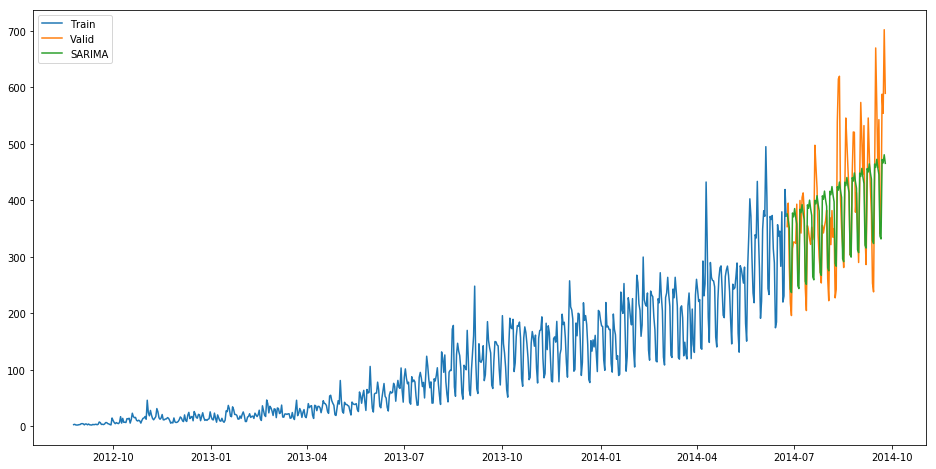

In [151]:
y_hat_avg=valid.copy()
fit3 =sm.tsa.statespace.SARIMAX(Train.Count,order=(2,1,4),seasonal_order=(0,1,1,7)).fit()
y_hat_avg['SARIMA'] = fit3.predict(start="2014-6-25", end="2014-9-25", dynamic=True)
plt.figure(figsize=(16,8)) 
plt.plot( Train['Count'], label='Train') 
plt.plot(valid['Count'], label='Valid') 
plt.plot(y_hat_avg['SARIMA'], label='SARIMA') 
plt.legend(loc='best') 
plt.show()

In [152]:
rms = sqrt(mean_squared_error(valid.Count, y_hat_avg.SARIMA)) 
print(rms)

69.8853957024


Note that these are the daily predictions and we need hourly predictions. So, we will distribute this daily prediction into hourly counts. To do so, we will take the ratio of hourly distribution of passenger count from train data and then we will distribute the predictions in the same ratio.

In [155]:
predict2=fit3.predict(start="2014-9-26", end="2015-4-26", dynamic=True)
# Merge Test and test_original on day, month and year 
data_test['prediction_2']=predict2
merge=pd.merge(data_test, test_original, on=('day','month', 'year'), how='left') 
merge['hour']=merge['hour_y'] 
merge=merge.drop(['year', 'month', 'Datetime','hour_x','hour_y'], axis=1) 

# Predicting by merging merge and temp2 
prediction=pd.merge(merge, temp2, on='hour', how='left') 

# Converting the ratio to the original scale 
prediction['Count']=prediction['prediction']*prediction['ratio']*24
#Let’s drop all variables other than ID and Count

prediction['ID']=prediction['ID_y'] 
submission=prediction.drop(['day','hour','ratio','prediction', 'ID_x', 'ID_y'],axis=1) 

# Converting the final submission to csv format 
pd.DataFrame(submission, columns=['ID','Count']).to_csv('SARIMAX.csv')

C:\Users\Rohan\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\kalman_filter.py:1740: ValueWarning: Dynamic prediction specified to begin during out-of-sample forecasting period, and so has no effect.
  ' effect.', ValueWarning)
